# Assignment 1

In [1]:
from numpy import random
import numpy as np
from pytictoc import TicToc
import matplotlib.pyplot as plt
import math
from sklearn import datasets
import pandas as pd

In [2]:
math.__file__

'/Users/wangjiangyi/opt/anaconda3/lib/python3.8/lib-dynload/math.cpython-38-darwin.so'

In [3]:
np.__file__

'/Users/wangjiangyi/opt/anaconda3/lib/python3.8/site-packages/numpy/__init__.py'

In [4]:
plt.__file__

'/Users/wangjiangyi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'

## Q2) Matrix Inverse

### (1) Generate n*n matrix from uniform distribution [0,1]

In [2]:
n = 1000
mat = random.random(size=(n,n))

In [3]:
mat

array([[0.8134594 , 0.41274573, 0.90447388, ..., 0.34232232, 0.02832248,
        0.45494089],
       [0.35698115, 0.37031809, 0.5587645 , ..., 0.00447076, 0.21890737,
        0.74779371],
       [0.43308595, 0.04868757, 0.39632633, ..., 0.14250149, 0.25866216,
        0.54713335],
       ...,
       [0.05666005, 0.9947064 , 0.52979212, ..., 0.65347291, 0.56150543,
        0.93420773],
       [0.85447627, 0.17565363, 0.47393116, ..., 0.86283044, 0.27840433,
        0.99181662],
       [0.2880233 , 0.56865299, 0.44135648, ..., 0.20005977, 0.65588779,
        0.54099123]])

In [4]:
# check the entry distribution for mat
count = np.zeros(10)
for i in range(n):
    for j in range(n):
        idx = int(mat[i][j]*10)
        count[idx] += 1

count/n/n
# from this vector, we can deduce that, those entries are indeed uniformly distributed in [0,1]

array([0.099876, 0.10029 , 0.10033 , 0.099868, 0.100252, 0.099933,
       0.099914, 0.099287, 0.100161, 0.100089])

### (2) Prove that $A = I + X^TX$ is symmetric and positive definite

#### Prove (Symmetry):
$$
\begin{equation}
A^T = (I + X^TX)^T = I^T + (X^TX)^T = I + X^TX = A
\end{equation}
$$
here, we use: $(AB)^T = B^TA^T$

#### Prove(Positive Definite):
for arbitray $x\in \mathbb{R}^n\ne \mathbb{0}$, we have:
$$
\begin{equation}
x^TAx = x^T(I+X^TX)x = x^Tx + x^TX^TXx \ge X^Tx \gt0
\end{equation}
$$
here, we use $u^Tu\ge0$ for arbitrary $u$ and $u^Tu\gt0$ for arbitrary $u\ne \mathbb{0}$

This is exactly the definition of **Positive Definite**.

### (3) Time required in inverting matrix with different sizes
- visualization

In [33]:
t = TicToc()

In [49]:
n_candidates = list(range(1000, 11000, 1000))
num = len(n_candidates)
time_candidates = np.zeros(num)
log_time_candidates = np.zeros(num)

for idx in range(num):
    n = n_candidates[idx]
    mat = random.random(size=(n,n))
    t.tic()
    mat_inverse = np.linalg.inv(mat)
    time = t.tocvalue()
    time_candidates[idx] = time
    log_time_candidates[idx] = math.log(time)

#### visualization

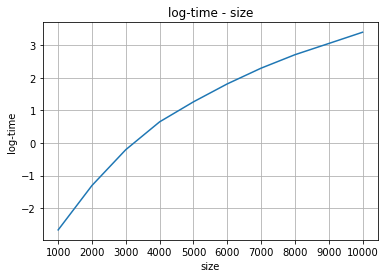

In [62]:
plt.figure(1)
plt.plot(log_time_candidates)
plt.xticks(list(range(num)), n_candidates)
plt.xlabel('size')
plt.ylabel('log-time')
plt.grid()
plt.title('log-time - size')
plt.show()

### (4) Largest n that device can handle

In [63]:
# try and record the time
n_max = 20000
mat = random.random(size=(n_max,n_max))
t.tic()
mat_inverse = np.linalg.inv(mat)
t.toc()

Elapsed time is 223.359096 seconds.


#### Remark:
- Perhaps this **is not** the largest size of matrix that my device can inverse, but actually it will **take quite a long time(223 seconds)** to inverse the matrix of this size (**20000 $\times$ 20000**).

## Q3) PCA from scratch

### (1) load iris dataset

In [205]:
iris = datasets.load_iris(as_frame = True)

#### Dataset Description

In [206]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [207]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [208]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [209]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### (2) Standardization

In [210]:
def num2spe(x):
    if x==0:
        return 'setosa'
    elif x==1:
        return 'versicolor'
    else:
        return 'virginica'

data = iris.data
data['target'] = iris.target
data['species'] = data['target'].map(num2spe)

In [211]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [212]:
std_feature_names = []
for feature_name in iris.feature_names:
    std_feature_name = 'std ' + feature_name
    std_feature_names.append(std_feature_name)
    data[std_feature_name] = (data[feature_name] - data[feature_name].mean()) / data[feature_name].std()

#### Report

In [213]:
data[std_feature_names + ['species']].head(3)

,std sepal length (cm),std sepal width (cm),std petal length (cm),std petal width (cm),species
0,-0.897674,1.015602,-1.335752,-1.311052,setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,setosa
2,-1.380727,0.327318,-1.392399,-1.311052,setosa


### (3) Covariance Matrix $X^TX$

In [214]:
X = data[std_feature_names].values
cov = np.matmul(X.T, X)

#### Report

In [215]:
cov

array([[149.        , -17.51789784, 129.89131261, 121.87322781],
       [-17.51789784, 149.        , -63.83757555, -54.55276395],
       [129.89131261, -63.83757555, 149.        , 143.46694928],
       [121.87322781, -54.55276395, 143.46694928, 149.        ]])

### (4) Eigenvalue Decomposition

In [216]:
eig_value, eig_vector = np.linalg.eig(cov)

In [217]:
Q, D = eig_vector, np.diag(eig_value)

#### Verification

In [218]:
Q.dot(D).dot(Q.T)

array([[149.        , -17.51789784, 129.89131261, 121.87322781],
       [-17.51789784, 149.        , -63.83757555, -54.55276395],
       [129.89131261, -63.83757555, 149.        , 143.46694928],
       [121.87322781, -54.55276395, 143.46694928, 149.        ]])

In [219]:
cov

array([[149.        , -17.51789784, 129.89131261, 121.87322781],
       [-17.51789784, 149.        , -63.83757555, -54.55276395],
       [129.89131261, -63.83757555, 149.        , 143.46694928],
       [121.87322781, -54.55276395, 143.46694928, 149.        ]])

#### Report

In [220]:
print('---------------------------Q:---------------------------')
print(Q)
print('---------------------------D:---------------------------')
print(D)

---------------------------Q:---------------------------
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
---------------------------D:---------------------------
[[434.85617466   0.           0.           0.        ]
 [  0.         136.19054025   0.           0.        ]
 [  0.           0.          21.86677446   0.        ]
 [  0.           0.           0.           3.08651063]]


### (5) First Principal Component

In [224]:
def num2col(x):
    if x==0:
        return 'red'
    elif x==1:
        return 'lightgreen'
    else:
        return 'dodgerblue'
    
# achieve the first direction
direction1 = Q.T[0]

# calculate the projection
data['PC1'] = direction1[0] * data['std sepal length (cm)'] + direction1[1] * data['std sepal width (cm)'] \
    + direction1[2] * data['std petal length (cm)'] + direction1[3] * data['std petal width (cm)']

# for visualization
data['redundant'] = 0
data['color'] = data['target'].map(num2col)

In [225]:
data[['PC1', 'species']].head()

,PC1,species
0,-2.257141,setosa
1,-2.074013,setosa
2,-2.356335,setosa
3,-2.291707,setosa
4,-2.381863,setosa


#### visualization

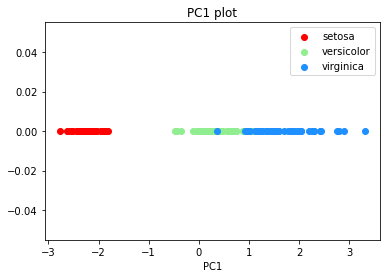

In [244]:
for targ in range(3):
    data_slice = data[data['target'] == targ]
    x, y = data_slice['PC1'], data_slice['redundant']
    c, l = num2col(targ), num2spe(targ)
    plt.scatter(x = x, y = y, c = c, label = l)

plt.xlabel('PC1')
plt.title('PC1 plot')
plt.legend()
plt.show()

### (6) First 2 Principal Component

In [242]:
# achieve the second direction
direction2 = Q.T[1]

# calculate the projection
data['PC2'] = direction2[0] * data['std sepal length (cm)'] + direction2[1] * data['std sepal width (cm)'] \
    + direction2[2] * data['std petal length (cm)'] + direction2[3] * data['std petal width (cm)']

In [243]:
data[['PC1', 'PC2', 'species']].head()

,PC1,PC2,species
0,-2.257141,-0.478424,setosa
1,-2.074013,0.671883,setosa
2,-2.356335,0.340766,setosa
3,-2.291707,0.595400,setosa
4,-2.381863,-0.644676,setosa


#### visualization

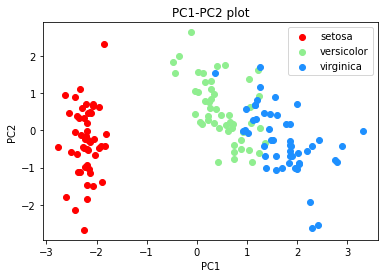

In [245]:
for targ in range(3):
    data_slice = data[data['target'] == targ]
    x, y = data_slice['PC1'], data_slice['PC2']
    c, l = num2col(targ), num2spe(targ)
    plt.scatter(x = x, y = y, c = c, label = l)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1-PC2 plot')
plt.legend()
plt.show()